## 实验二  图像变换
### 一、实验目的
1. 熟悉图像从空间到频域的变换；
2. 掌握图像的傅里叶变换及其性质；
3. 掌握图像的离散余弦变换及其性质。

### 二、实验内容
#### 1.图像的傅里叶变换

origin (256, 256)
f (256, 256)
fshift (256, 256)


Text(0.5, 1.0, 'the high pin combine with center')

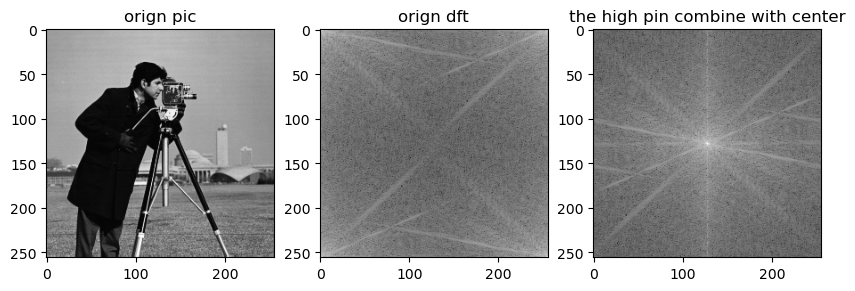

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# /读取图片 灰度图
img =cv2.imread("cameraman.tif",0)
img32 = np.float32(img)
# 傅里变换二维
f = np.fft.fft2(img32)
# 将傅里叶变化后的直流分量移动到频谱中央
fshift = np.fft.fftshift(f)
print('origin',img32.shape)
print('f',f.shape)
print('fshift',fshift.shape)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
# 可视化
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,8),dpi=100)
axes[0].imshow(img,'gray')
axes[0].set_title("orign pic")
axes[1].imshow(s1,'gray')
axes[1].set_title("orign dft")
axes[2].imshow(s2,'gray')
axes[2].set_title("the high pin combine with center")

### 2.图像傅里叶变换平移性质 

(256, 256)
row,col: 256, 256 
[[ -440.           +0.j          -864.67967281 -604.70373418j
   -358.86572761+1269.06164574j ...   841.13949632-1820.28615531j
   -358.86572761-1269.06164574j  -864.67967281 +604.70373418j]
 [-1803.48642873-1546.4750323j    536.12582589 +728.90677772j
   -867.79265699 +673.31797718j ...  2976.66415346-2651.36333026j
  -1358.56656419 -995.05776233j   584.4729345 +1216.79267394j]
 [  106.97461571-1448.15788914j   181.92425524 +865.81180527j
   -746.55291804 -741.06891791j ...  1203.80645363 -551.20930092j
    514.98942565 -665.49878556j -1345.16120855 -108.91389176j]
 ...
 [ 1765.99343337+1764.65717209j -2535.73461614 +184.7867659j
    278.58055477+1669.67343868j ...  -705.60852928-1014.83048116j
   -223.30912394 +691.34456138j -1258.16087652 -428.8930885j ]
 [  106.97461571+1448.15788914j -1345.16120855 +108.91389176j
    514.98942565 +665.49878556j ... -1300.54620737-2479.29001286j
   -746.55291804 +741.06891791j   181.92425524 -865.81180527j]
 [-1803.486

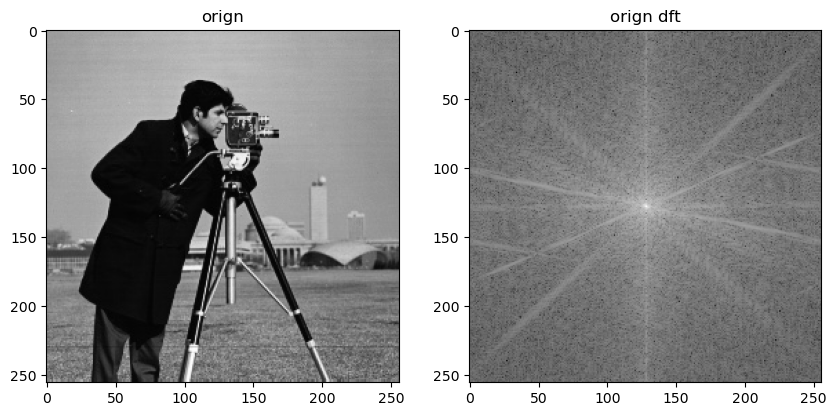

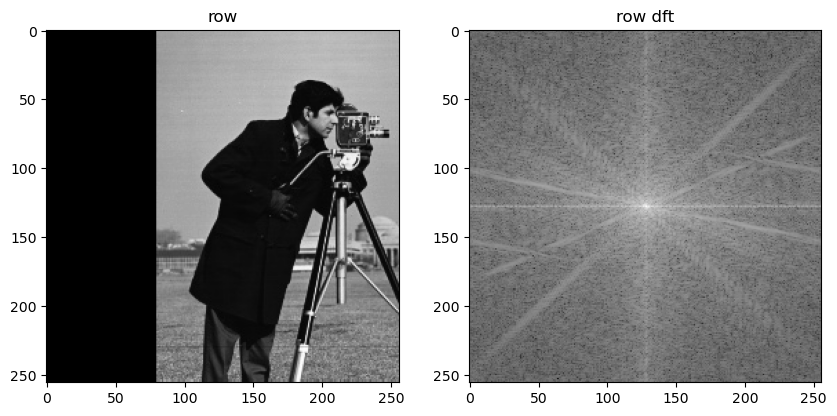

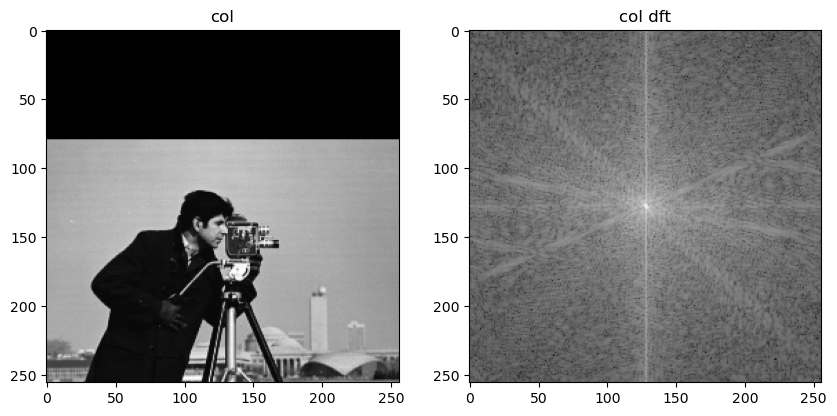

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread('cameraman.tif',0)
print(img1.shape)
rows,cols = img1.shape[:2]
print("row,col: {}, {} ".format(rows,cols))
# 原图傅里叶变换
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
s0 = np.log(np.abs(fshift))

print(fshift)
print(np.abs(fshift))
print(np.log(np.abs(fshift)))
# M作为仿射变换矩阵，一般反映平移或旋转的关系，为InputArray类型的2×3的变换矩阵。
M1 = np.float32([[1,0,80],[0,1,0]])# 平移矩阵
img_row = cv2.warpAffine(img1,M1,(cols,rows))
# 傅里叶变换 img_row
f_row = np.fft.fft2(img_row)
fshift_row = np.fft.fftshift(f_row)
s1 = np.log(np.abs(fshift_row))
M2=np.float32([[1,0,0],[0,1,80]])# 平移矩阵
img_col = cv2.warpAffine(img1,M2,(cols,rows))
# 傅里叶变换 img_col
f_col = np.fft.fft2(img_col)
fshift_col = np.fft.fftshift(f_col)
s2 = np.log(np.abs(fshift_col))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img1,'gray')
axes[0].set_title("orign")
axes[1].imshow(s0,'gray')
axes[1].set_title("orign dft")
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_row,'gray')
axes[0].set_title("row")
axes[1].imshow(s1,'gray')
axes[1].set_title("row dft")
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_col,'gray')
axes[0].set_title("col")
axes[1].imshow(s2,'gray')
axes[1].set_title("col dft")
plt.show()

### 3.图像傅里叶变换旋转性质 

[[  0.70710678   0.70710678 -53.01933598]
 [ -0.70710678   0.70710678 128.        ]]


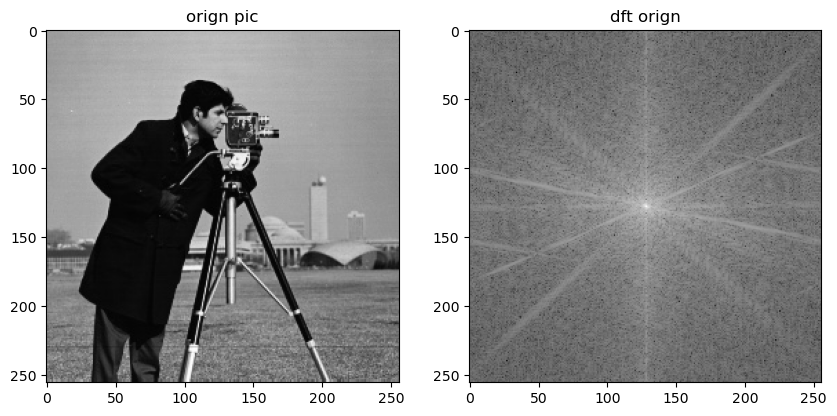

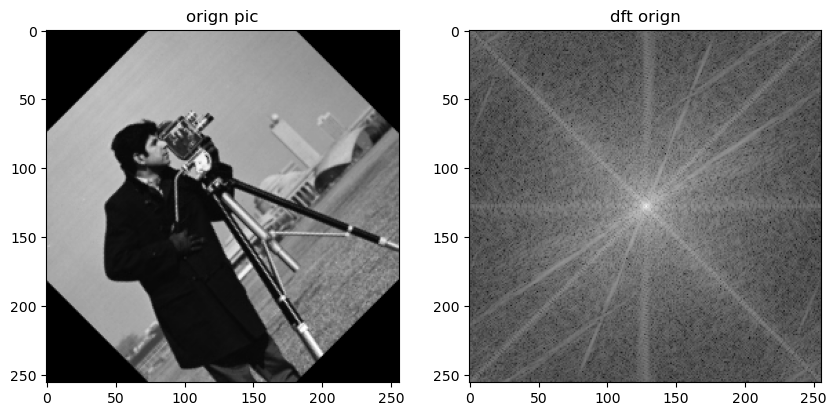

In [42]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
img_orign=cv2.imread('cameraman.tif',0)
rows,cols=img_orign.shape[:2]
# 2.1生成旋转矩阵   旋转中心点坐标  角度 缩放比例
M1=cv2.getRotationMatrix2D((cols/2,rows/2),45,1)

# 2.2 进行旋转变换
img_circle=cv2.warpAffine(img_orign,M1,(cols,rows))
# 傅里叶变换 orign
f_orign = np.fft.fft2(img_orign)
fshift_orign = np.fft.fftshift(f_orign)
s_orign = np.log(np.abs(fshift_orign))
# 傅里叶变换 旋转
f_circle = np.fft.fft2(img_circle)
fshift_circle = np.fft.fftshift(f_circle)
s_circle = np.log(np.abs(fshift_circle))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_orign,'gray')
axes[0].set_title("orign pic")
axes[1].imshow(s_orign,'gray')
axes[1].set_title("dft orign")
plt.show()
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_circle,'gray')
axes[0].set_title("orign pic")
axes[1].imshow(s_circle,'gray')
axes[1].set_title("dft orign")
plt.show()


### 1.读取一张自选灰度图像，绘制原始图像及原始图像的傅里叶变换频谱图。 

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


Text(0.5, 1.0, '傅里叶变换频谱图')

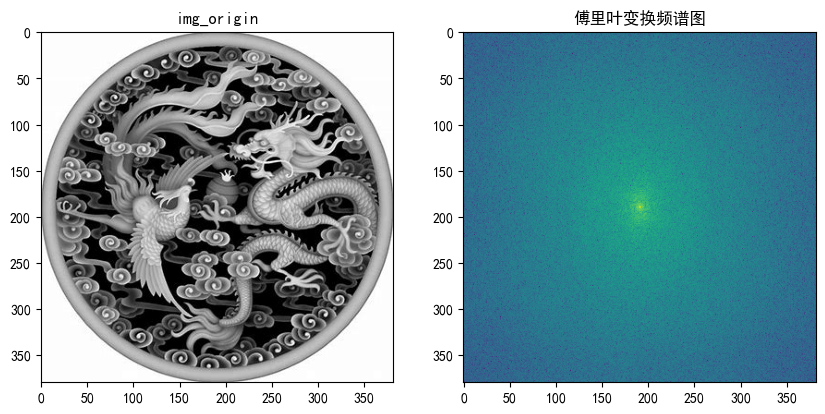

In [64]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

img_orign=cv2.imread('huidutu.jpg',0)
print(img_orign)

# 傅里叶变换 orign
f_orign = np.fft.fft2(img_orign)
fshift_orign = np.fft.fftshift(f_orign)
s_orign = np.log(np.abs(fshift_orign))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_orign,'gray')
axes[0].set_title("img_origin")
axes[1].imshow(s_orign)
axes[1].set_title("傅里叶变换频谱图")

### 2.参考实验内容2，创建一个小的白色圆形图像，对其进行X轴和Y轴上的平移，绘制原始图像和平移图像及3图像的傅里叶变换频谱图，进行观察并分析。

(329, 325)
row,col: 329, 325 


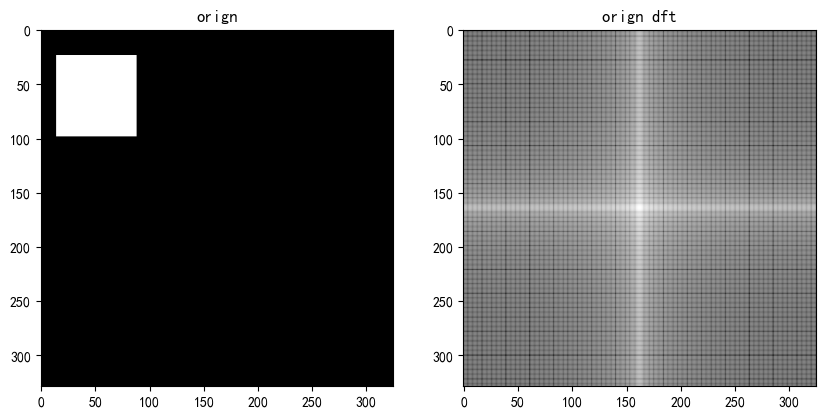

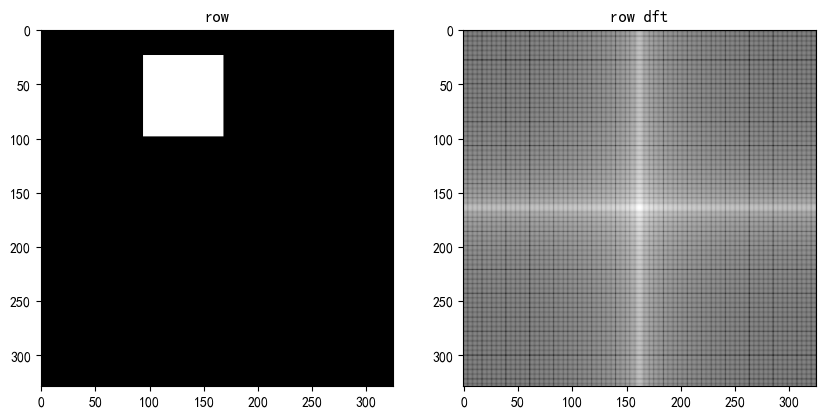

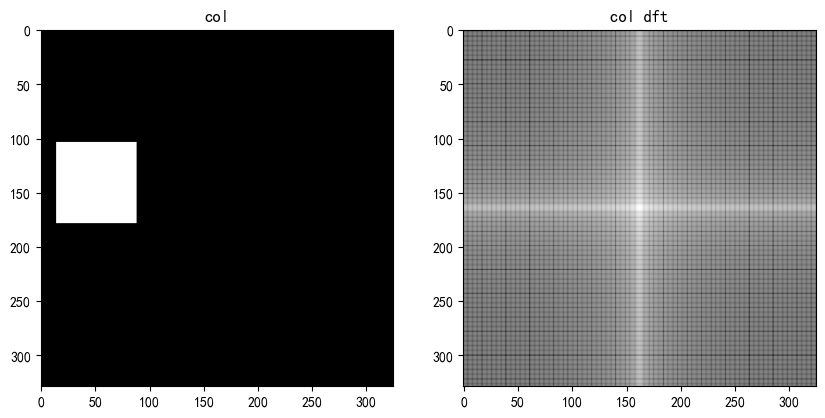

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread('white.png',0)
print(img1.shape)
rows,cols = img1.shape[:2]
print("row,col: {}, {} ".format(rows,cols))

#  原图傅里叶变换
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
s0 = np.log(np.abs(fshift))

# M作为仿射变换矩阵，一般反映平移或旋转的关系，为InputArray类型的2×3的变换矩阵。
M1 = np.float32([[1,0,80],[0,1,0]])# 平移矩阵
img_row = cv2.warpAffine(img1,M1,(cols,rows))
# 傅里叶变换 img_row
f_row = np.fft.fft2(img_row)
fshift_row = np.fft.fftshift(f_row)
s1 = np.log(np.abs(fshift_row))
M2=np.float32([[1,0,0],[0,1,80]])# 平移矩阵
img_col = cv2.warpAffine(img1,M2,(cols,rows))
# 傅里叶变换 img_col
f_col = np.fft.fft2(img_col)
fshift_col = np.fft.fftshift(f_col)
s2 = np.log(np.abs(fshift_col))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img1,'gray')
axes[0].set_title("orign")
axes[1].imshow(s0,'gray')
axes[1].set_title("orign dft")
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_row,'gray')
axes[0].set_title("row")
axes[1].imshow(s1,'gray')
axes[1].set_title("row dft")
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_col,'gray')
axes[0].set_title("col")
axes[1].imshow(s2,'gray')
axes[1].set_title("col dft")
plt.show()

### 


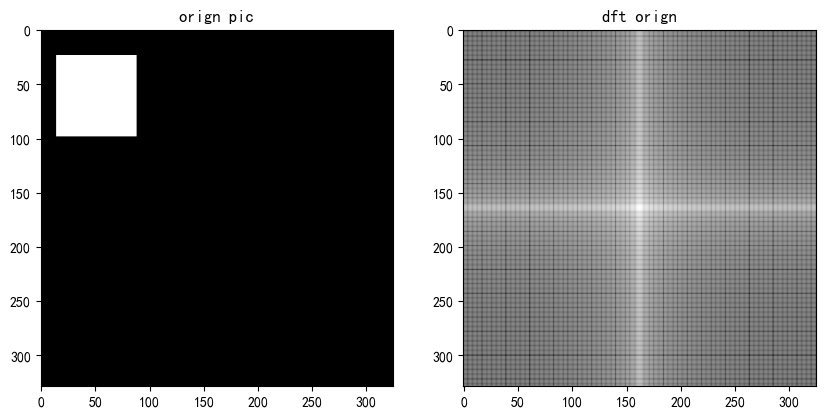

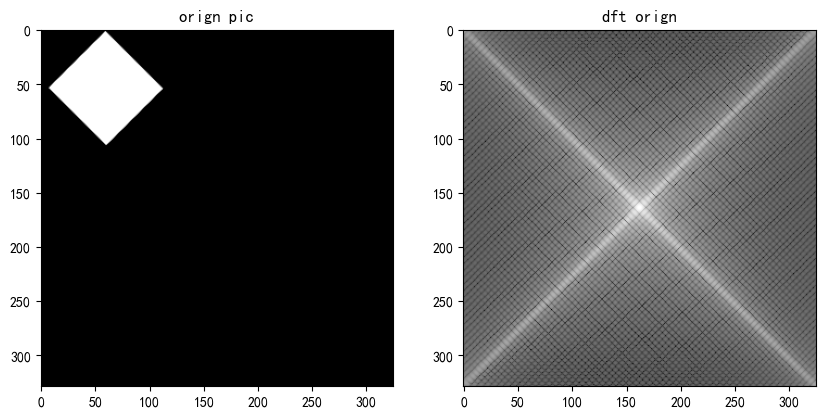

In [80]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
img_orign=cv2.imread('white.png',0)
rows,cols=img_orign.shape[:2]
# 2.1生成旋转矩阵   旋转中心点坐标  角度 缩放比例
M1=cv2.getRotationMatrix2D((cols/7,rows/7),45,1)

# 2.2 进行旋转变换
img_circle=cv2.warpAffine(img_orign,M1,(cols,rows))
# 傅里叶变换 orign
f_orign = np.fft.fft2(img_orign)
fshift_orign = np.fft.fftshift(f_orign)
s_orign = np.log(np.abs(fshift_orign))
# 傅里叶变换 旋转
f_circle = np.fft.fft2(img_circle)
fshift_circle = np.fft.fftshift(f_circle)
s_circle = np.log(np.abs(fshift_circle))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_orign,'gray')
axes[0].set_title("orign pic")
axes[1].imshow(s_orign,'gray')
axes[1].set_title("dft orign")
plt.show()
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_circle,'gray')
axes[0].set_title("orign pic")
axes[1].imshow(s_circle,'gray')
axes[1].set_title("dft orign")
plt.show()


(380, 382)
row,col: 380, 382 


C:\Users\Bruan\AppData\Local\Temp\ipykernel_54432\2280236575.py:14: RuntimeWarning: divide by zero encountered in log
  img_idct_log = np.log(abs(img_idct))  # 进行log处理  方便用plt显示


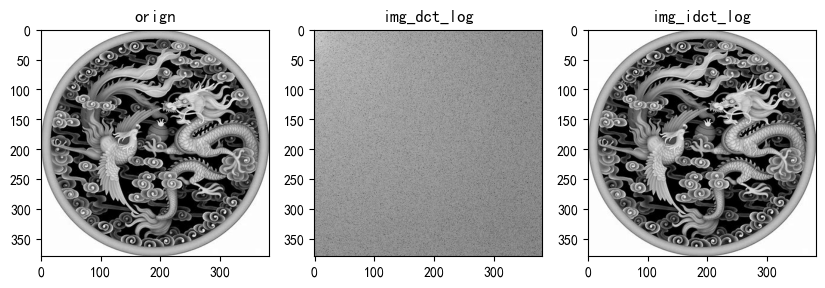

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('huidutu.jpg',0)
print(img1.shape)
rows,cols = img1.shape[:2]
print("row,col: {}, {} ".format(rows,cols))

img1 = img.astype('float')  # 将uint8转化为float类型
img_dct = cv2.dct(img1)  # 进行离散余弦变换
img_dct_log = np.log(abs(img_dct))  # 进行log处理  方便用plt显示

img_idct = cv2.idct(img_dct)  # 进行离散反余弦变换
img_idct_log = np.log(abs(img_idct))  # 进行log处理  方便用plt显示

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,8),dpi=100)
axes[0].imshow(img1,'gray')
axes[0].set_title("orign")
axes[1].imshow(img_dct_log,'gray')
axes[1].set_title("img_dct_log")
axes[2].imshow(img_idct,'gray')
axes[2].set_title("img_idct_log")
plt.show()